In [15]:
import keras
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from models.lenet_official import LeNet
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from dataset_loaders import SimpleDatasetLoader
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

In [16]:
sdl = SimpleDatasetLoader()

In [17]:
image_paths = list(paths.list_images('./datasets/digits'))

In [18]:
(data, labels) = sdl.load(image_paths, verbose=500)

[INFO] processed 500/2301
[INFO] processed 1000/2301
[INFO] processed 1500/2301
[INFO] processed 2000/2301


In [19]:
data = data.astype("float") / 255.0

In [20]:
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [21]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1725, 28, 28), (1725,), (576, 28, 28), (576,))

In [22]:
y_train = LabelBinarizer().fit_transform(y_train)

In [23]:
y_test = LabelBinarizer().fit_transform(y_test)

In [24]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1725, 28, 28), (1725, 10), (576, 28, 28), (576, 10))

In [25]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [26]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [27]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1725, 28, 28, 1), (1725, 10), (576, 28, 28, 1), (576, 10))

In [28]:
opt = SGD(lr=0.01, decay=0.01 / 100, momentum=0.9, nesterov=True)

In [29]:
model = LeNet.build(width=28, height=28, depth=1, num_classes=10)

In [30]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [31]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('models/best_weights.hdf5', monitor="val_loss", save_best_only=True, verbose=1)
callbacks = [checkpoint]

In [32]:
H = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test),  
              epochs=100, verbose=1, callbacks=callbacks)

Train on 1725 samples, validate on 576 samples
Epoch 1/100
1725/1725 [==============================] - 1s 860us/step - loss: 2.2917 - acc: 0.1472 - val_loss: 2.2640 - val_acc: 0.1493

Epoch 00001: val_loss improved from inf to 2.26397, saving model to models/best_weights.hdf5
Epoch 2/100
1725/1725 [==============================] - 0s 231us/step - loss: 2.1820 - acc: 0.2139 - val_loss: 1.9209 - val_acc: 0.4740

Epoch 00002: val_loss improved from 2.26397 to 1.92087, saving model to models/best_weights.hdf5
Epoch 3/100
1725/1725 [==============================] - 0s 221us/step - loss: 1.2065 - acc: 0.6261 - val_loss: 0.4597 - val_acc: 0.8681

Epoch 00003: val_loss improved from 1.92087 to 0.45970, saving model to models/best_weights.hdf5
Epoch 4/100
1725/1725 [==============================] - 0s 229us/step - loss: 0.4314 - acc: 0.8713 - val_loss: 0.1752 - val_acc: 0.9757

Epoch 00004: val_loss improved from 0.45970 to 0.17520, saving model to models/best_weights.hdf5
Epoch 5/100
1725/


Epoch 00041: val_loss did not improve from 0.09587
Epoch 42/100
1725/1725 [==============================] - 0s 223us/step - loss: 0.0294 - acc: 0.9919 - val_loss: 0.1084 - val_acc: 0.9913

Epoch 00042: val_loss did not improve from 0.09587
Epoch 43/100
1725/1725 [==============================] - 0s 228us/step - loss: 0.0352 - acc: 0.9907 - val_loss: 0.1087 - val_acc: 0.9896

Epoch 00043: val_loss did not improve from 0.09587
Epoch 44/100
1725/1725 [==============================] - 0s 222us/step - loss: 0.0268 - acc: 0.9930 - val_loss: 0.1143 - val_acc: 0.9878

Epoch 00044: val_loss did not improve from 0.09587
Epoch 45/100
1725/1725 [==============================] - 0s 218us/step - loss: 0.0251 - acc: 0.9930 - val_loss: 0.1033 - val_acc: 0.9913

Epoch 00045: val_loss did not improve from 0.09587
Epoch 46/100
1725/1725 [==============================] - 0s 222us/step - loss: 0.0269 - acc: 0.9936 - val_loss: 0.1147 - val_acc: 0.9896

Epoch 00046: val_loss did not improve from 0.0958

1725/1725 [==============================] - 0s 234us/step - loss: 0.0148 - acc: 0.9942 - val_loss: 0.1107 - val_acc: 0.9878

Epoch 00085: val_loss did not improve from 0.09587
Epoch 86/100
1725/1725 [==============================] - 0s 220us/step - loss: 0.0190 - acc: 0.9959 - val_loss: 0.1038 - val_acc: 0.9913

Epoch 00086: val_loss did not improve from 0.09587
Epoch 87/100
1725/1725 [==============================] - 0s 245us/step - loss: 0.0151 - acc: 0.9942 - val_loss: 0.1035 - val_acc: 0.9913

Epoch 00087: val_loss did not improve from 0.09587
Epoch 88/100
1725/1725 [==============================] - 0s 223us/step - loss: 0.0125 - acc: 0.9977 - val_loss: 0.1072 - val_acc: 0.9896

Epoch 00088: val_loss did not improve from 0.09587
Epoch 89/100
1725/1725 [==============================] - 0s 243us/step - loss: 0.0130 - acc: 0.9942 - val_loss: 0.1049 - val_acc: 0.9878

Epoch 00089: val_loss did not improve from 0.09587
Epoch 90/100
1725/1725 [==============================] - 0s 22

In [33]:
predictions = model.predict(x_test, batch_size=32)

In [34]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), 
                      target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        86
          1       0.97      0.98      0.98        63
          2       1.00      1.00      1.00        75
          3       1.00      0.96      0.98        49
          4       1.00      0.98      0.99        51
          5       0.98      1.00      0.99        43
          6       1.00      1.00      1.00        43
          7       1.00      1.00      1.00        53
          8       0.96      0.98      0.97        53
          9       0.97      0.97      0.97        60

avg / total       0.99      0.99      0.99       576



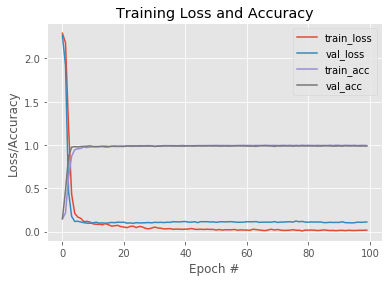

In [35]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()